# Regression and Model Selection

# Generic Regression

The generic representation of regression is in the following form:

$$
\textbf{Y} = f(\textbf{X}, \mathbf{ \beta })
$$

where $\textbf{X}$ are the input variables, and $\textbf{Y}$ are the output/target variables.

We can specify the model itself, $f$ and the model parameters $\mathbf{\beta}$ and then the objective is to find the values $\mathbf{\beta}$.

# Linear Regression Model

Before we looked at a linear model of line-fitting:

data: $(x_1, y_1), (x_2, y_2), (x_3, y_3), \cdots, (x_n, y_n)$

model: $\textbf{Y} = f(\textbf{X}, \mathbf{ \beta }) = \beta_1\textbf{X} + \beta_2$

# Nonlinear Regression Model

Now let's look at minimizing a nonlinear model, this can become much more difficult and does not always have a closed form solution. 

$$
\textbf{Y} = f(\textbf{X}, \mathbf{ \beta })
$$

We can do the same thing, with nonlinear function $f$ and minimize the error by computing the derivative. That is to minimize the error:

$$
\sum_{k=1}^n \left(f(x_k, \beta)-y_k\right)\dfrac{\partial f}{\partial \beta_j} = 0 \\
j = 1, 2, 3,\cdots, m
$$

Minimizing the error, particularly one with a high-dimensional surface, can be difficult to compute and is most notable solved using a method called Gradient Descent

# Gradient Descent

Gradient descent is a key method used in many techniques related to machine learning.

The idea is to update the $\beta$ parameters that will move downhill along a gradient surface. Here the gradient surface is the error surface and moving downhill causes us to find a local or global minimum in error.

$$
\nabla f(x) = 0
$$

The main issue that many optimizers fall into is being stuck in a local minimum. Optimiziers have various methods to push the $\beta$ parameters ouside of the local minimum.

# Gradient Descent Algorithm


data: $(x_1, y_1), (x_2, y_2), (x_3, y_3), \cdots, (x_n, y_n)$

model: $\textbf{Y} = f(\textbf{X}, \mathbf{ \beta })$

iterate: $x_{k+1}(\delta) = x_k - \delta \nabla f(x_k)$

The main process of gradient descent is to iteratively take small steps in the direction which will the minimize error. The size of the step is noted as $\delta$ which is a scalar to how large of a step we want to take in the downward direction of the graident. This $\delta$ value is normally known as the **learning rate** parameter and is typically predefined before-hand.

Note that the **optimal learning rate** can be learned by, again, minimization which is typically computationally expensive as another deriviative is computed.

### Solving for the optimal learning rate

iterate: $x_{k+1}(\delta) = x_k - \delta \nabla f(x_k)$

$$
F(\delta) = f(x_{k+1}(\delta)) \\
\dfrac{\partial F}{\partial \delta} = -\nabla f(x_{k+1})\nabla f (x_k) = 0
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# rcParams.update({'font.size': 18})

In [2]:
# build xy coordinates
h = 0.5
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)

X, Y = np.meshgrid(x,y)

# build an error surface
F0 =      1.5 - 1.0 * np.exp(-0.03 * (3 * np.power(X, 2)     + np.power(Y, 2)))       # first bump
F  =      1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X, 2)     + np.power(Y + 3, 2)))   # second bump
F2 = F + (0.5 - 1.0 * np.exp(-0.1  * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2))))  # combine two bumps

# compute the gradients

# dF0x,dF0y = np.gradient(F0,h,h) 
# dF2x,dF2y = np.gradient(F2,h,h) 

dF0y, dF0x = np.gradient(F0, h, h) 
dF2y, dF2x = np.gradient(F2, h, h) 

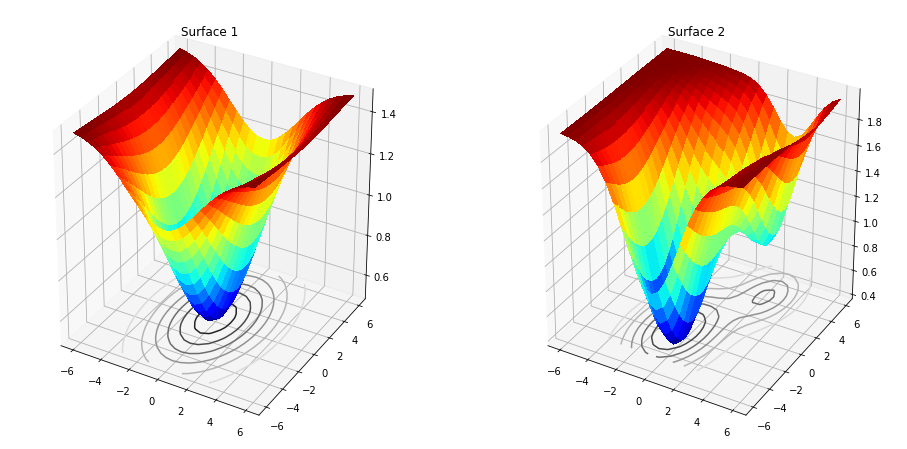

In [3]:
# plot the surfaces
rcParams['figure.figsize'] = [16, 8]
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

axs[0].set_title('Surface 1')
axs[0].plot_surface(X, Y, F0, cmap='jet',linewidth=0, antialiased=False)
axs[0].contour(X, Y, F0, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')

axs[1].set_title('Surface 2')
axs[1].plot_surface(X, Y, F2, cmap='jet',linewidth=0, antialiased=False)
axs[1].contour(X, Y, F2, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')

plt.show()

<Figure size 1152x1152 with 0 Axes>

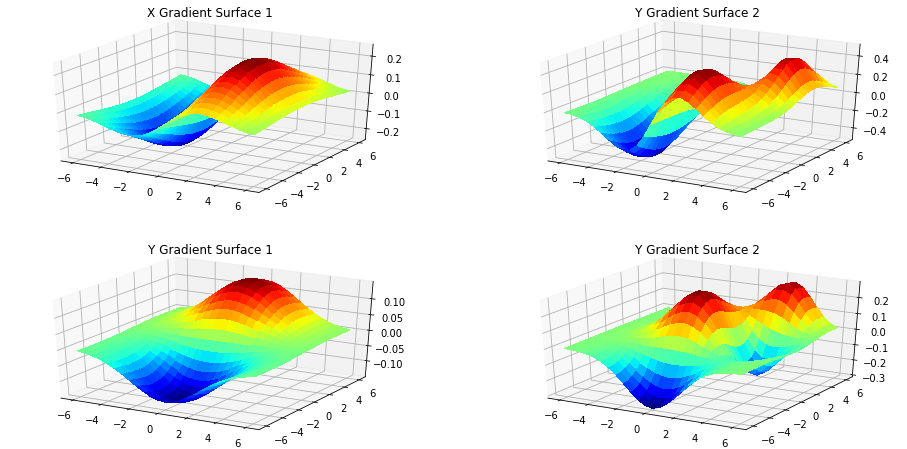

In [4]:
# plot the surface gradients
plt.figure(figsize=(16,16))
fig, axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)

axs[0].set_title('X Gradient Surface 1')
axs[0].plot_surface(X, Y, dF0x, cmap='jet', linewidth=0, antialiased=False)

axs[2].set_title('Y Gradient Surface 1')
axs[2].plot_surface(X, Y, dF0y, cmap='jet', linewidth=0, antialiased=False)

axs[1].set_title('Y Gradient Surface 2')
axs[1].plot_surface(X, Y, dF2x, cmap='jet', linewidth=0, antialiased=False)

axs[3].set_title('Y Gradient Surface 2')
axs[3].plot_surface(X, Y, dF2y, cmap='jet', linewidth=0, antialiased=False)

plt.show()

# Surface 1 Gradient Descent

In [5]:
# build xy coordinates
h = 0.5
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)

X, Y = np.meshgrid(x,y)

n_iternations = 10

# Gradient Descent
x = np.zeros(n_iternations)
y = np.zeros(n_iternations)
f = np.zeros(n_iternations)

# generate actual model surface
Fquad = np.power(X, 2) + 3 * np.power(Y, 2)

# Initial guess (eventually will converge over iterations)
x[0] = 3
y[0] = 2

# Initial function value
f[0] = x[0] ** 2 + 3 * y[0] ** 2

for j in range(len(x)-1):
    # compute the gradient AND the optimal step-size (typically set as constant)
    Delta = (x[j] ** 2 + 9 * y[j] ** 2) / (2 * x[j] ** 2 + 54 * y[j] ** 2)
    
    # update values 𝑥_{𝑘+1}(𝛿)=𝑥_𝑘−𝛿∇𝑓(𝑥_𝑘)
    x[j+1] = (1 - 2 * Delta) * x[j]
    y[j+1] = (1 - 6 * Delta) * y[j]
    
    f[j+1] = x[j+1] ** 2 + 3 * y[j+1] ** 2
    
    # check convergence (check if error is numerically small, computational errors)
    if np.abs(f[j+1] - f[j]) < 10 ** (-6):
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break

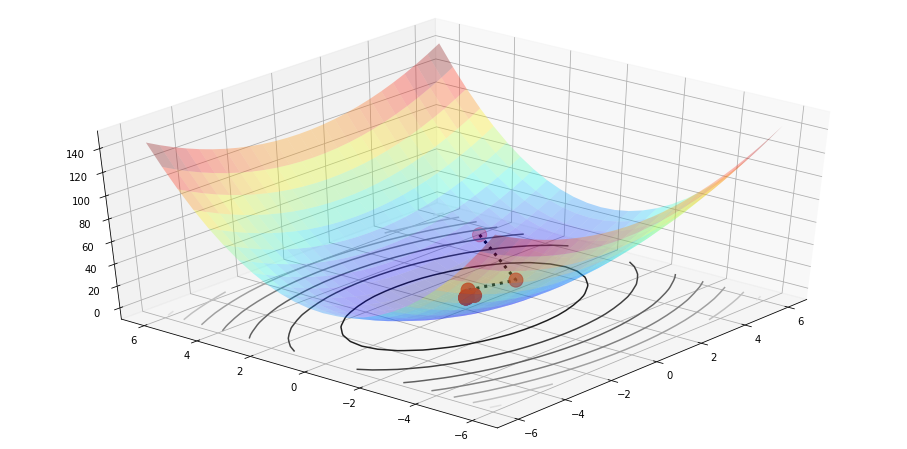

In [6]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
# ax.plot_surface(X, Y, Fquad, linewidth=0, color='k', alpha=0.3)
ax.plot_surface(X, Y, Fquad, linewidth=0, cmap='jet', alpha=0.3)
ax.scatter(x, y, f, 'o', color='r', s=200)
ax.plot(x, y, f, ':', color='k', LineWidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()

# Surface 2 Gradient Descent

In [7]:
# Computing the gradient descent with fmin
h = 0.01
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)
X,Y = np.meshgrid(x, y)

# generate actual model surface
F1 =      1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X + 3, 2) + np.power(Y + 3, 2)))
F  = F1 + 0.5 -       np.exp(-0.1  * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2)))

# setup interpolation functions to compute
dFy, dFx = np.gradient(F, h, h)
F_interp   = scipy.interpolate.RectBivariateSpline(x, y, F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x, y, dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x, y, dFy)

def deltaSearch(Del,t):
    x, y, dfx, dfy, X, Y, F = t
    x0 = x - Del * dfx
    y0 = y - Del * dfy
    return F_interp(x0,y0)

# try 3 different initial locations
x0 = np.array([4, 0, -5])
y0 = np.array([0, -5, 4])

for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0], y[0])
    
    dfx = dFx_interp(x[0], y[0])
    dfy = dFy_interp(x[0], y[0])
    for j in range(len(x)-1):
        # use scipy to optimize the stepsize to take
        t = x[j], y[j], dfx, dfy, X, Y, F
        Delta = scipy.optimize.fmin(deltaSearch, 0.2, args=(t,), disp=False);
        
        # Update x, y, and f
        x[j+1] = x[j] - Delta*dfx
        y[j+1] = y[j] - Delta*dfy
        f[j+1] = F_interp(x[j+1], y[j+1])
        
        dfx = dFx_interp(x[j+1], y[j+1])
        dfy = dFy_interp(x[j+1], y[j+1])
        
        if np.abs(f[j+1]-f[j]) < 10**(-6):
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break
    
    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

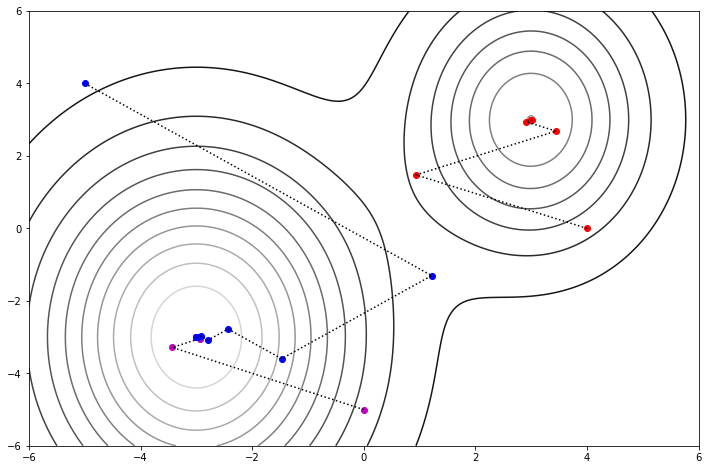

In [8]:
plt.figure(figsize=(12,8))
plt.contour(X, Y, F-1, 10, cmap='binary')
plt.plot(x1, y1, 'o', color='r')
plt.plot(x1, y1, ':', color='k')

plt.plot(x2, y2, 'o', color='m')
plt.plot(x2, y2, ':', color='k')

plt.plot(x3, y3, 'o', color='b')
plt.plot(x3, y3, ':', color='k')

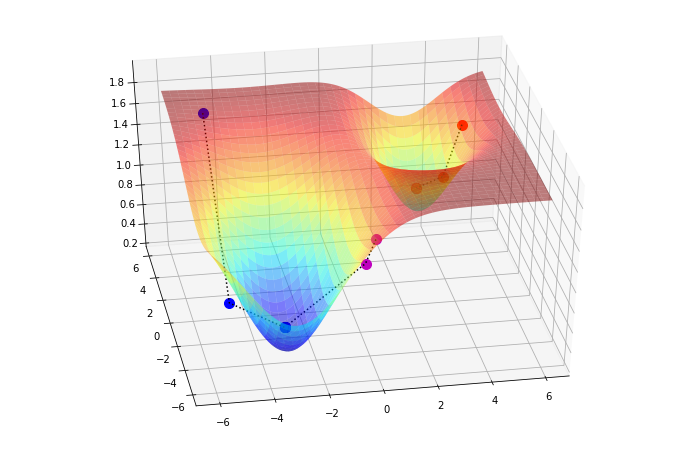

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F - 0.2, cmap='jet',alpha=0.5)

ax.plot(x1, y1, f1, 'o', color='r', MarkerSize=10)
ax.plot(x1, y1, f1, ':', color='k')

ax.plot(x2, y2, f2, 'o', color='m', MarkerSize=10)
ax.plot(x2, y2, f2, ':', color='k')

ax.plot(x3, y3, f3, 'o', color='b', MarkerSize=10)
ax.plot(x3, y3, f3, ':', color='k')

ax.view_init(elev=40, azim=-100)

# Surface 2 Alternating Descent

The computing and stepping in the direction of the gradient of all the dimensions (2 in this case) can become highly computationally expensive. Another method is to alternate a dimension while fixing the others, then minimizing and updating along each of the individual dimensions.

In [10]:
# Alternating Descent
h = 0.1
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)
X,Y = np.meshgrid(x, y)

# generate actual model surface
F1 =      1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X + 3, 2) + np.power(Y + 3, 2)))
F  = F1 + 0.5 -       np.exp(-0.1  * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2)))

# setup interpolation functions to compute
F_interp = scipy.interpolate.RectBivariateSpline(x, y, F)

# try 3 different initial locations
x0 = np.array([4, 0, -5])
y0 = np.array([0, -5, 2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])
    
    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]
    
    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]
    
    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])
    
    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

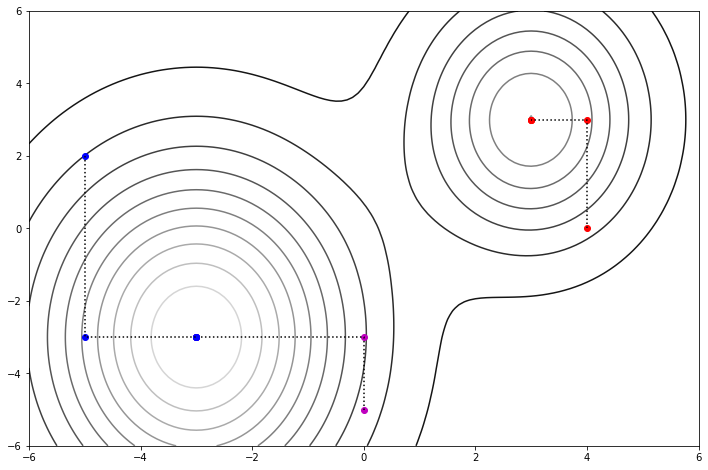

In [17]:
plt.figure(figsize=(12, 8))
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')

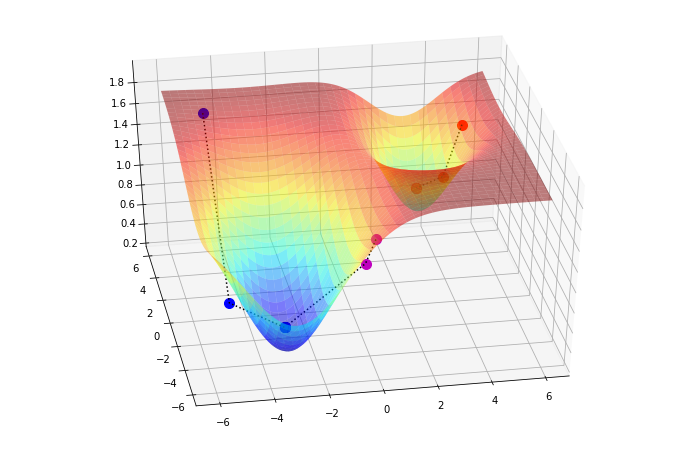

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F - 0.2, cmap='jet', alpha=0.5)

ax.plot(x1, y1, f1, 'o', color='r', MarkerSize=10)
ax.plot(x1, y1, f1, ':', color='k')

ax.plot(x2, y2, f2, ' o', color='m', MarkerSize=10)
ax.plot(x2, y2, f2, ':', color='k')

ax.plot(x3, y3, f3, 'o', color='b', MarkerSize=10)
ax.plot(x3, y3, f3, ':', color='k')

ax.view_init(elev=40, azim=-100)